# Exercises

Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.



In [36]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

from pydataset import data

np.random.seed(514)

#  Iris Clustering

In [37]:
iris = data('iris')

In [38]:
iris = iris.rename(columns={'Sepal.Length': 'sepal_length', 'Sepal.Width': 'sepal_width', 'Petal.Length': 'petal_length', 'Petal.Width': 'petal_width'})

In [35]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

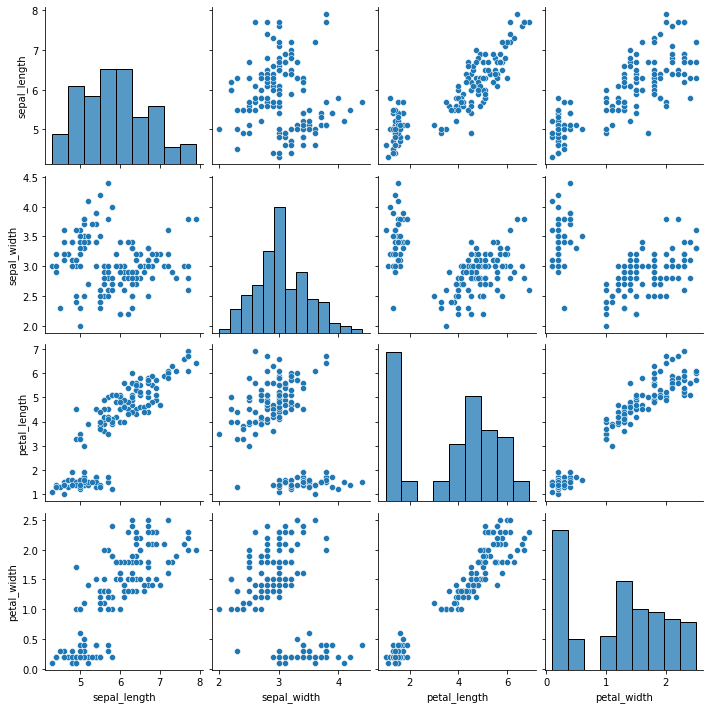

In [39]:
#decide which features to select for cluster fitting
# visusalize with pairplot first get ideas
sns.pairplot(data=iris)

Choose features other than the ones used in the lesson.


In [40]:
#choose sepal length and petal width based on observation
X = iris[['sepal_length', 'petal_width']]

In [42]:
#choose number of features for n_clusters .. referred to as k outside of function
kmeans = KMeans(n_clusters=3)

#fit model object
kmeans.fit(X)

#use the model
iris['cluster'] = kmeans.predict(X)

Visualize the results of your clustering.


<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

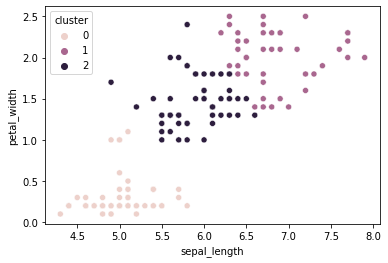

In [45]:
sns.scatterplot(data=iris, x='sepal_length', y='petal_width', hue='cluster')

<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

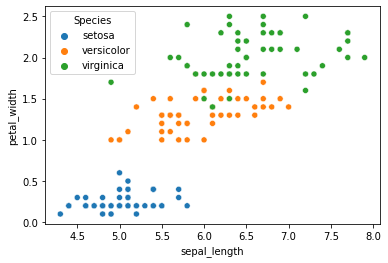

In [48]:
sns.scatterplot(data=iris, x='sepal_length', y='petal_width', hue='Species')

In [54]:
#visualize cluster centers
#use the X columns that helped to fit the cluster object
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

#do groupby to see the centroid 'coordinates'
iris.groupby('cluster')['sepal_length', 'petal_width'].mean()

,sepal_length,petal_width
cluster,,
0,5.005556,0.303704
1,6.857143,2.011905
2,5.892593,1.462963


Text(0.5, 1.0, 'Visualizing Cluster Centers')

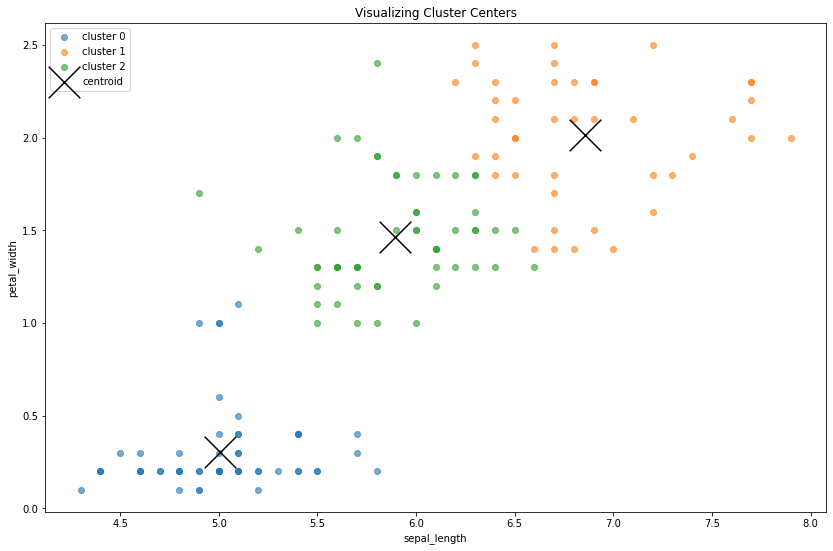

In [55]:
#visualize cluster centers --> lesson code

#set the figure object size 
plt.figure(figsize=(14,9))

#create for loop that pulls the two pieces of a groupby objectg out:
for cluster, subset in iris.groupby('cluster'):

    #create plt scatter plot and use cluster as title member
    plt.scatter(subset.sepal_length, subset.petal_width,
                label=f'cluster {cluster}', alpha=.6)

centroids.plot.scatter(y='petal_width', x='sepal_length',
                        c='black', marker='x', s=1000,
                        ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')

Takeaway   
looks pretty ssplit. will compare it the same graph with hue = species
slightly off the mark

Use the elbow method to visually select a good value for k.


Text(0.5, 1.0, 'Change in inertia as k increases')

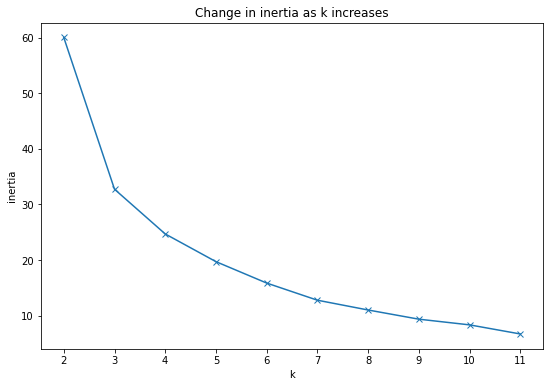

In [58]:
#create figure object
plt.figure(figsize=(9,6))

#create series to hold the interia for each value of k in a given range
#plots the series immediately by calling .plot on it
pd.Series({k:KMeans(k).fit(X).inertia_ for k in range(2,12)}).plot(marker='x')
plt.xticks(range(2,12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')

Repeat the clustering, this time with 3 different features.


In [63]:
#select third feature, will choose petal length. Will keep same visual
X = iris[['sepal_length', 'petal_width', 'petal_length']]

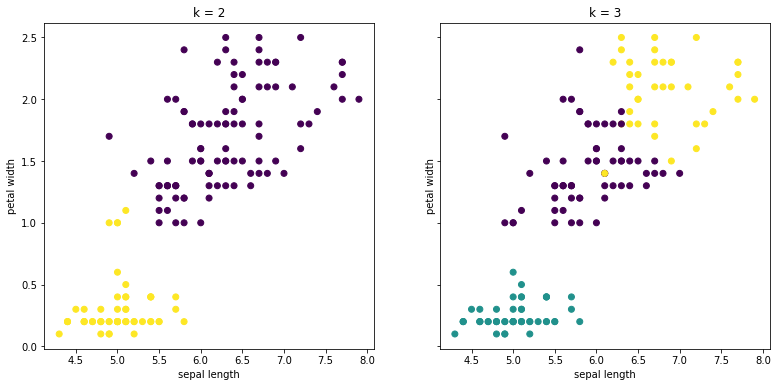

In [64]:
#what is the c parameter
fig, axs = plt.subplots(1,2, figsize=(13, 6), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 4)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_length, X.petal_width, c=clusters)
    ax.set(title=f'k = {k}', xlabel='sepal length', ylabel='petal width')

# Mall Data Clustering 
Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!



How does scaling impact the results of clustering?



Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.



Bonus
a) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
b) Visualize the data and guess the number and shape of the clusters.
c) Implement the KMeans algorithm on unscaled data and visualize the clusters.
d) Repeat the step above but with scaled data. 
c) Write down the takeaways from this exercise.


